In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import six

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'figures' #'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure4_voyages', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2017-01-05 16:00:38	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json
2017-01-05 16:00:38	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2017-01-05 16:01:00 	Initializing Study
2017-01-05 16:01:00 	Initializing Predictor configuration manager for Study
2017-01-05 16:01:00	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-05 16:01:00	Added ExtraTreesClassifier to default predictors
2017-01-05 16:01:00	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-05 16:01:00	Added ExtraTreesRegressor to default predictors
2017-01-05 16:01:00	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-05 16:01:00	Added GradientBoostingClassifier to defa

Error loading species hg19 data: HTTP Error 404: Not Found

In [3]:
figure_folder = '{}/002_waypointplots'.format(folder)
! mkdir $figure_folder

In [4]:
waypoints = study.supplemental.waypoints.rename(columns={'Unnamed: 1': 'event_id'})

In [5]:
waypoints = waypoints.set_index('event_id', append=True)
waypoints.head()

0  \
phenotype event_id                                                       
MN        isoform1=junction:chr10:102114390-102120490:+|i...  0.000000   
          isoform1=junction:chr10:102746733-102747069:-|i...  0.142857   
          isoform1=junction:chr10:103113986-103190101:+|i...  0.916667   
          isoform1=junction:chr10:103348158-103360494:+|i...  0.000000   
          isoform1=junction:chr10:103361094-103368591:+|i...  1.000000   

                                                                     1  
phenotype event_id                                                      
MN        isoform1=junction:chr10:102114390-102120490:+|i...  1.000000  
          isoform1=junction:chr10:102746733-102747069:-|i...  0.857143  
          isoform1=junction:chr10:103113986-103190101:+|i...  0.083333  
          isoform1=junction:chr10:103348158-103360494:+|i...  1.000000  
          isoform1=junction:chr10:103361094-103368591:+|i...  0.000000

In [6]:
import bonvoyage

In [7]:
study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality     
MN         bimodal           450
           excluded          890
           included          735
           uncategorized       1
NPC        bimodal           735
           excluded         1254
           included         1043
           uncategorized       4
iPSC       bimodal          1189
           excluded         1624
           included         1585
           uncategorized      36
dtype: int64

In [8]:
study.supplemental.modalities_tidy = study.supplemental.modalities_tidy.replace(
    {'modality': {'ambivalent': 'uncategorized', 'concurrent': 'middle'}})

In [9]:
study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality     
MN         bimodal           450
           excluded          890
           included          735
           uncategorized       1
NPC        bimodal           735
           excluded         1254
           included         1043
           uncategorized       4
iPSC       bimodal          1189
           excluded         1624
           included         1585
           uncategorized      36
dtype: int64

In [10]:
modalities_grouped = study.supplemental.modalities_tidy.groupby('phenotype')

In [11]:
import matplotlib as mpl

In [12]:
sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


In [13]:
from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER


In [14]:
pkm_event = u'exon:chr15:72499069-72499221:-@exon:chr15:72495363-72495529:-@exon:chr15:72494795-72494961:-@exon:chr15:72492815-72492996:-'

In [15]:
plt.hexbin?

In [19]:
import bonvoyage

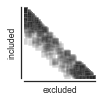

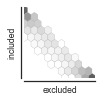

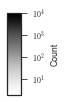

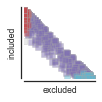

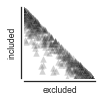

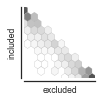

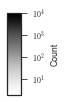

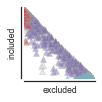

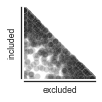

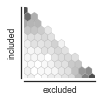

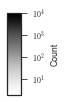

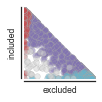

In [24]:
kinds = 'scatter', 'hexbin'

colorbar_ticklabels = [r'$10^{' + str(i) + '}$' for i in range(1, 5)]

for phenotype, df in waypoints.groupby(level=0, axis=0):
    df.index = df.index.droplevel(0)
    marker = study.phenotype_to_marker[phenotype]
    
#     six.print_(df.head())
    
    for kind in kinds:
        fig, ax = plt.subplots(figsize=(1.5, 1.5))
        kwargs = dict(rasterized=True, alpha=0.2, marker=marker) if kind == 'scatter' else dict(gridsize=10, vmax=4)
        bonvoyage.waypointplot(df, ax=ax, kind=kind, **kwargs)

#         # Double-plot PKM
#         x, y = df.loc[pkm_event]
#         color = study.phenotype_to_color[phenotype]
#         ax.plot(x, y, marker, markerfacecolor=None, markeredgecolor='k', markeredgewidth=.5, color=color)
#         ax.set(title='')
        
        ax.set(title='')
        fig.tight_layout()
#         sns.despine(offset=2)
        fig.savefig('{}/{}_{}.pdf'.format(figure_folder, phenotype, kind), dpi=300)
        
        if kind == 'hexbin':
            fig_colorbar, ax_colorbar = plt.subplots(figsize=(1, 1.5))
            plt.colorbar(ax.collections[0], cax=ax_colorbar, 
                         orientation='vertical',  label='Count', 
                         ticks=[1, 2, 3, 4])#mpl.ticker.MaxNLocator(4))
            ax_colorbar.yaxis.set_ticklabels(colorbar_ticklabels)
            fig_colorbar.tight_layout()
            fig_colorbar.savefig('{}/{}_{}_colorbar.pdf'.format(figure_folder, phenotype, kind), dpi=300)
        
        
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    modality_df = modalities_grouped.get_group(phenotype)
    groupby = modality_df.set_index('event_id')['modality']
    bonvoyage.waypointplot(df, ax=ax, kind='scatter', rasterized=True, features_groupby=groupby, marker=marker)
    ax.set(title='')
#     sns.despine(offset=3)
    fig.tight_layout()
    fig.savefig('{}/{}_scatter_modality.pdf'.format(figure_folder, phenotype), dpi=300)


In [25]:
kind = 'hexbin'

In [26]:
bonvoyage.visualize._waypoint_hexbin??

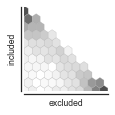

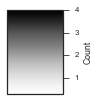

In [27]:
fig, ax = plt.subplots(figsize=(1.5, 1.5))
kwargs = dict(rasterized=True, alpha=0.2, marker=marker) if kind == 'scatter' else dict(gridsize=10, vmax=4)
bonvoyage.waypointplot(df, ax=ax, kind=kind, **kwargs)


fig_colorbar, ax_colorbar = plt.subplots(figsize=(1, 1.5))
plt.colorbar(ax.collections[0], cax=ax_colorbar, 
                         orientation='vertical',  label='Count', 
                         ticks=[-1, 0, 1, 2, 3, 4])


# # Double-plot PKM
# x, y = df.loc[pkm_event]
# color = study.phenotype_to_color[phenotype]
# ax.plot(x, y, marker, markerfacecolor=None, markeredgecolor='k', markeredgewidth=1, color=color)
# ax.set(title='')



### Same thing, but double-plot PKM

In [14]:
pkm_event = u'exon:chr15:72499069-72499221:-@exon:chr15:72495363-72495529:-@exon:chr15:72494795-72494961:-@exon:chr15:72492815-72492996:-'

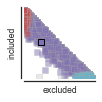

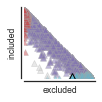

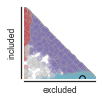

In [15]:
kind = 'scatter'

colorbar_ticklabels = [r'$10^{' + str(i) + '}$' for i in range(4)]

for phenotype, df in waypoints.groupby(level=0, axis=0):
    df.index = df.index.droplevel(0)
#     six.print_(df.head())
    
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    modality_df = modalities_grouped.get_group(phenotype)
    groupby = modality_df.set_index('event_id')['modality']
    marker = study.phenotype_to_marker[phenotype]
    bonvoyage.waypointplot(df, ax=ax, kind='scatter', rasterized=True, features_groupby=groupby, marker=marker)
    
    # Double-plot PKM
    x, y = df.loc[pkm_event]
    color = MODALITY_TO_COLOR[groupby[pkm_event]]
    ax.plot(x, y, marker, markerfacecolor=None, markeredgecolor='k', markeredgewidth=1, color=color)
    ax.set(title='')
    
    fig.tight_layout()
    fig.savefig('{}/{}_scatter_modality_pkm_annotated.pdf'.format(figure_folder, phenotype), dpi=300)
